# **Seaborn 주요 주제 실습**

# 1. 데이터 분포 파악

1) **히스토그램**

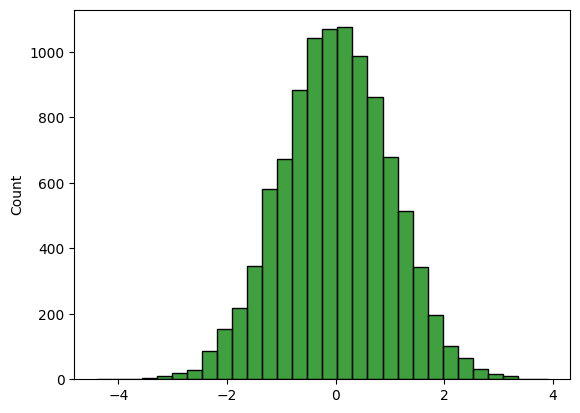

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

N = 10000
bins = 30

x = np.random.randn(N)

sns.histplot(x, bins = bins, kde = False, color = 'g')

plt.show()

<Axes: ylabel='Count'>

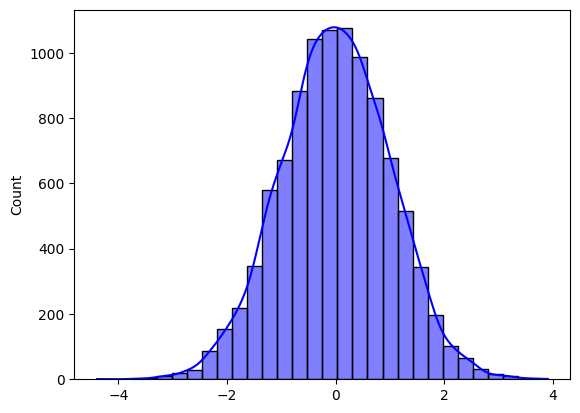

In [2]:
sns.histplot(x, bins = bins, kde = True, color = 'b')

In [4]:
df = sns.load_dataset("titanic")

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

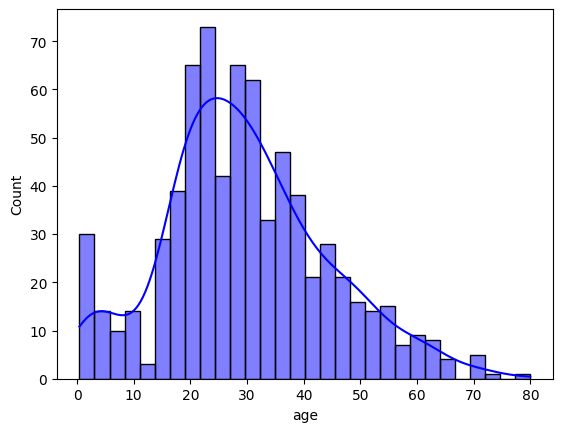

In [6]:
x = df["sex"]
y = df["age"]

sns.histplot(x = y, bins = 30, kde = True, color = 'b')

<Axes: xlabel='Count', ylabel='age'>

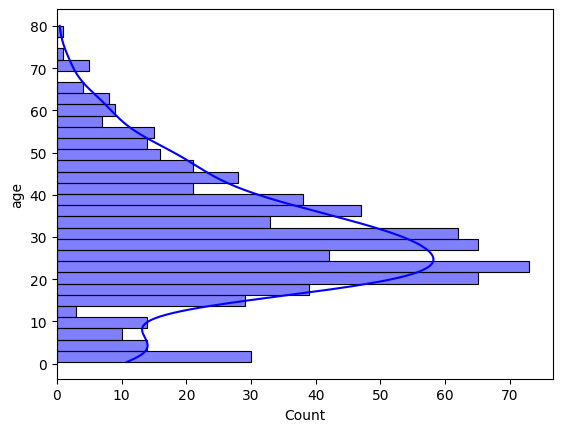

In [8]:
sns.histplot(y = y, bins = 30, kde = True, color = 'b')

2) **박스플롯**

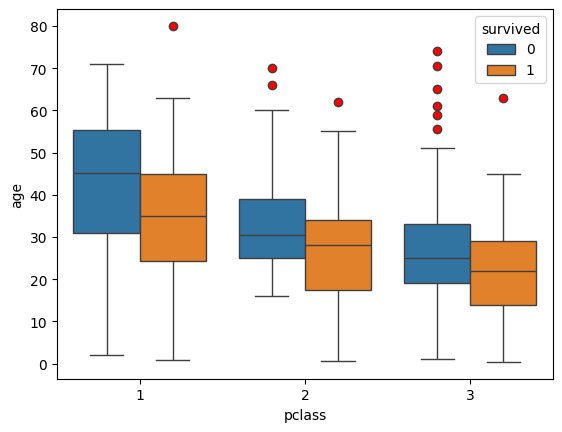

In [11]:
outlier_marker = dict(markerfacecolor = 'r', marker = 'o')

sns.boxplot(x = 'pclass', y = 'age', hue = 'survived', data = df, flierprops = outlier_marker)

plt.show()

3) **선그래프**

<Axes: xlabel='age', ylabel='fare'>

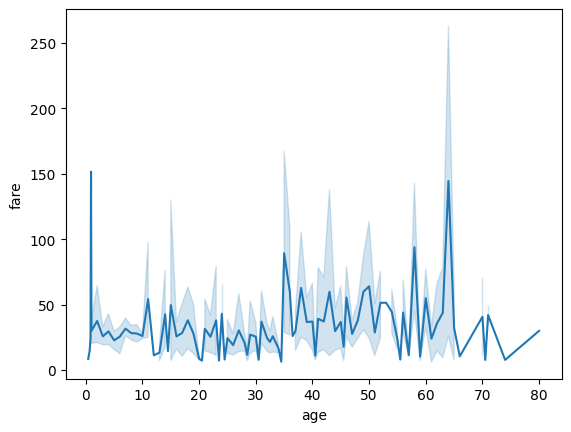

In [12]:
sns.lineplot(x = df['age'], y = df['fare'])

In [13]:
iris = sns.load_dataset('iris')

In [14]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


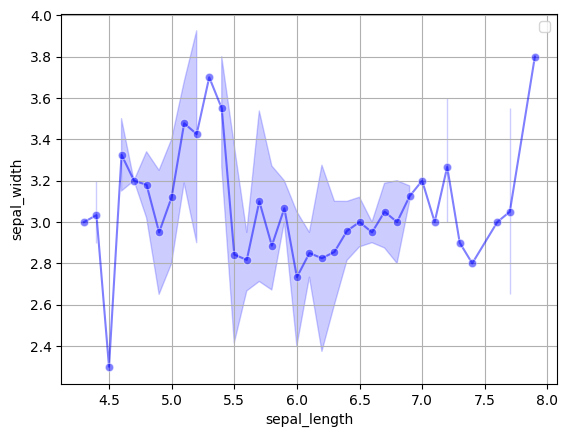

In [17]:
sns.lineplot(x = iris['sepal_length'], y = iris['sepal_width'], color = 'blue', alpha = 0.5, marker = 'o')

plt.grid()
plt.legend()

plt.show()

4) **히트맵**

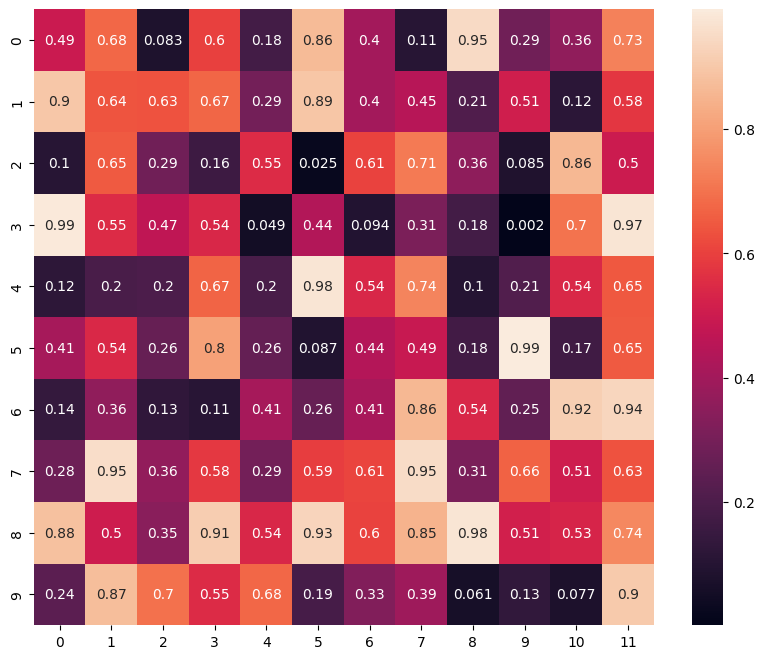

In [20]:
uniform_data = np.random.rand(10, 12)
plt.figure(figsize = (10, 8))
sns.heatmap(uniform_data, annot=True)
plt.show()

상관 관계 데이터 확인을 위한 수치화 하기

In [38]:
import seaborn as sns
import pandas as pd

# 데이터 로드
df = sns.load_dataset('titanic')

# 수치형 데이터만 선택
df_numeric = df.select_dtypes(include=['number'])
print("수치형 데이터의 상관관계:")
print(df_numeric.corr())

# 범주형 데이터 변환
df['sex_encoded'] = df['sex'].map({'male': 1, 'female': 0})

# 다시 상관관계 확인
print("\n변환된 데이터의 상관관계:")
print(df.corr())

수치형 데이터의 상관관계:
          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000

변환된 데이터의 상관관계:


ValueError: could not convert string to float: 'male'

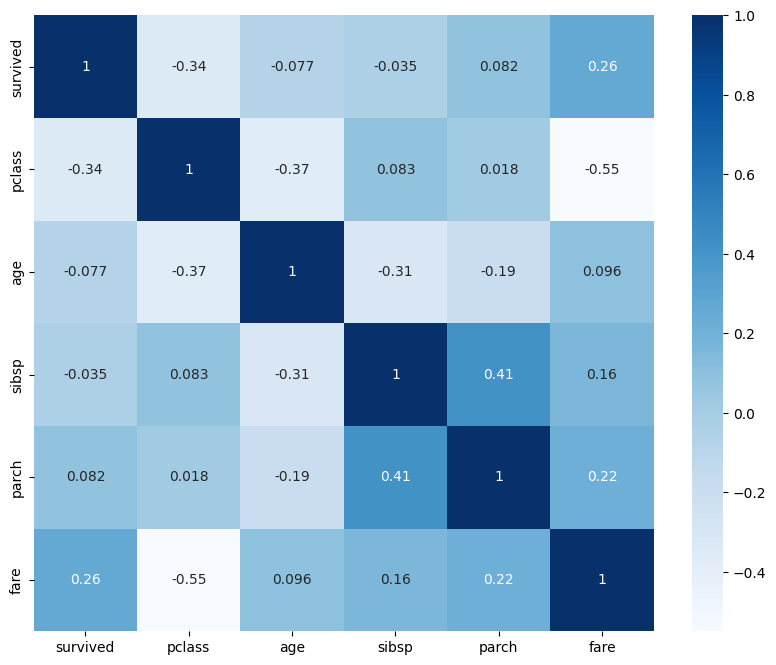

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df_numeric.corr(), annot = True, cmap = "Blues")
plt.show()

5) **커널밀도추정**

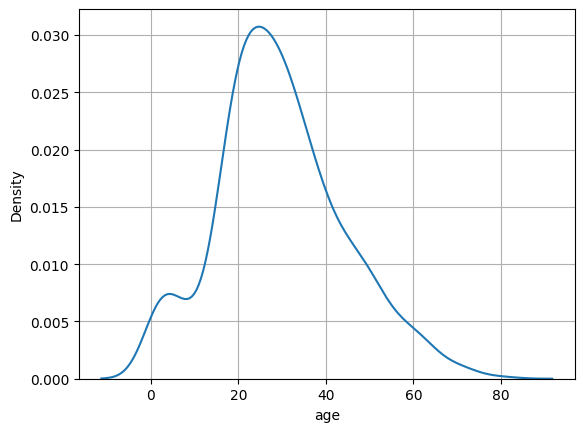

In [42]:
sns.kdeplot(x=df['age'])
plt.grid()
plt.show()

6) **페어플롯**

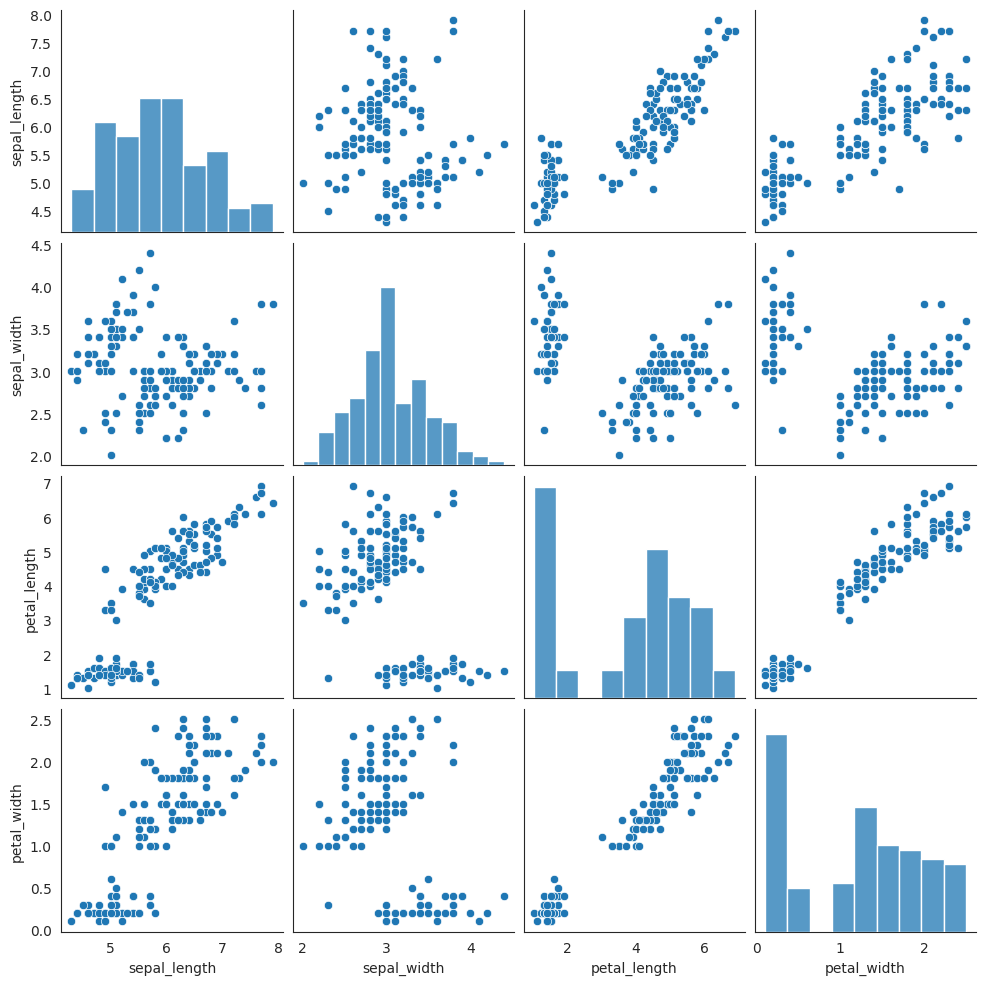

In [43]:
sns.set_style('white')
sns.pairplot(iris)
plt.show()

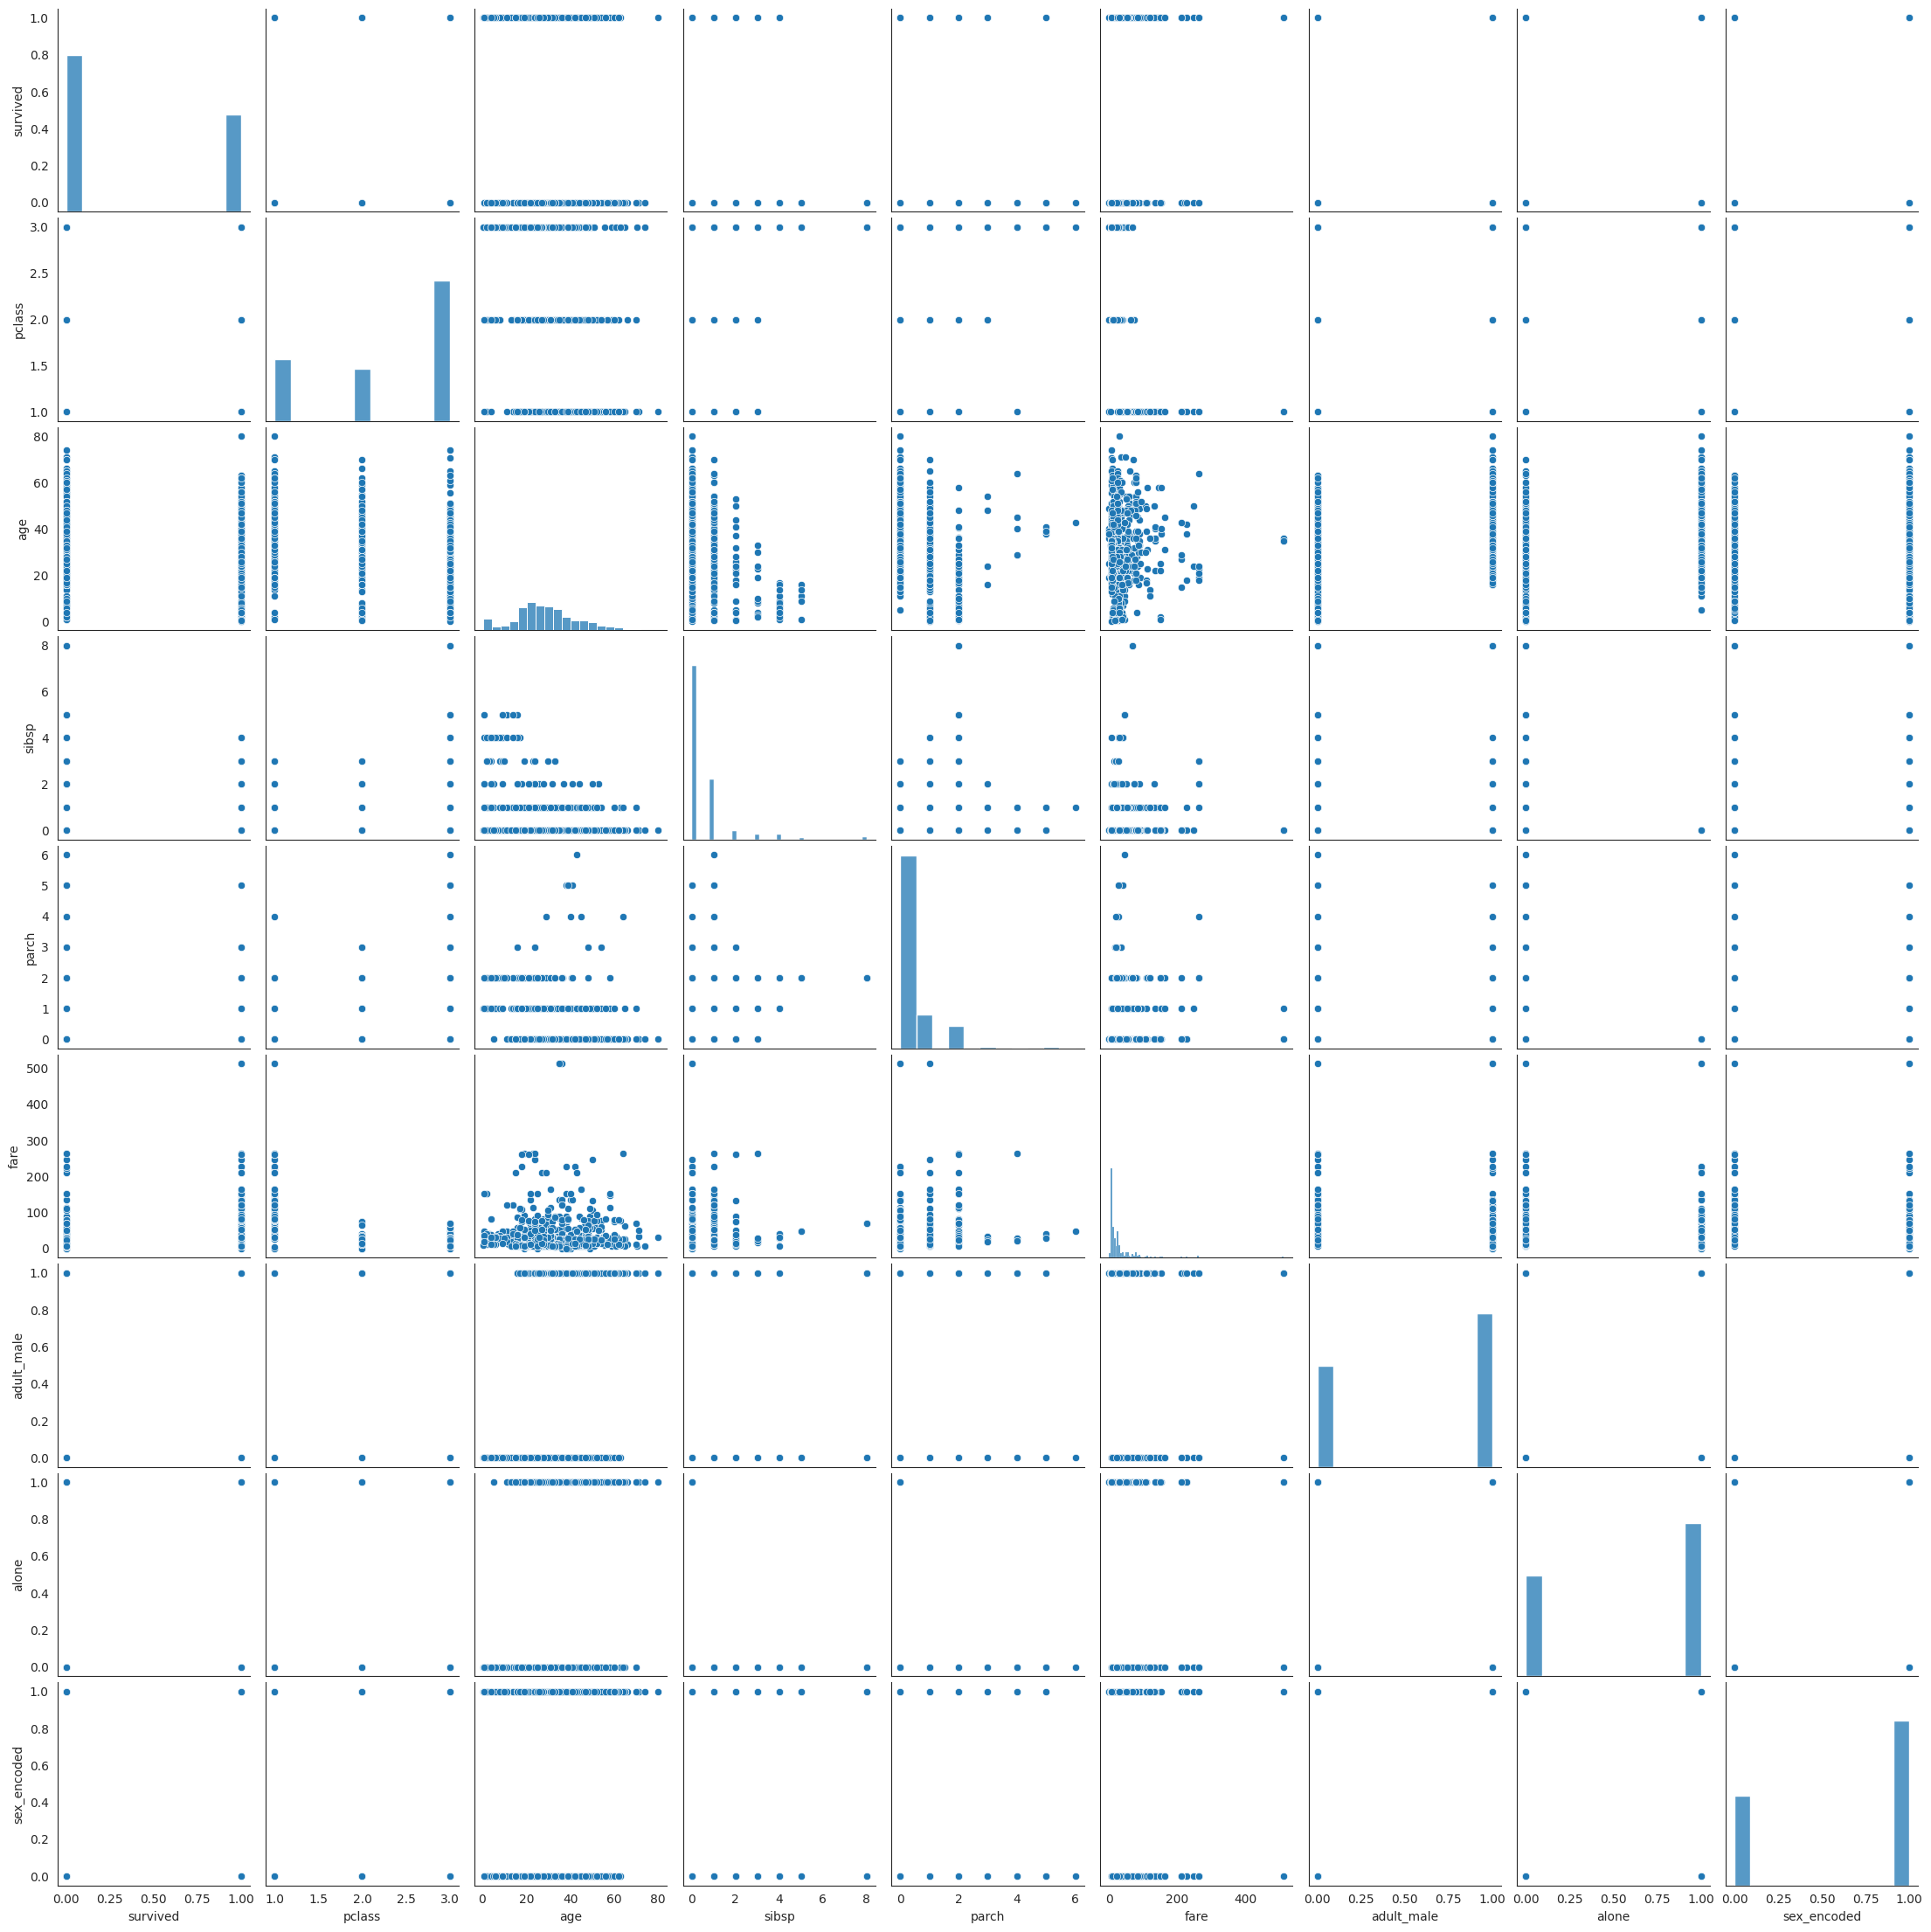

In [44]:
sns.pairplot(df)
plt.show()

7) **산점도**

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

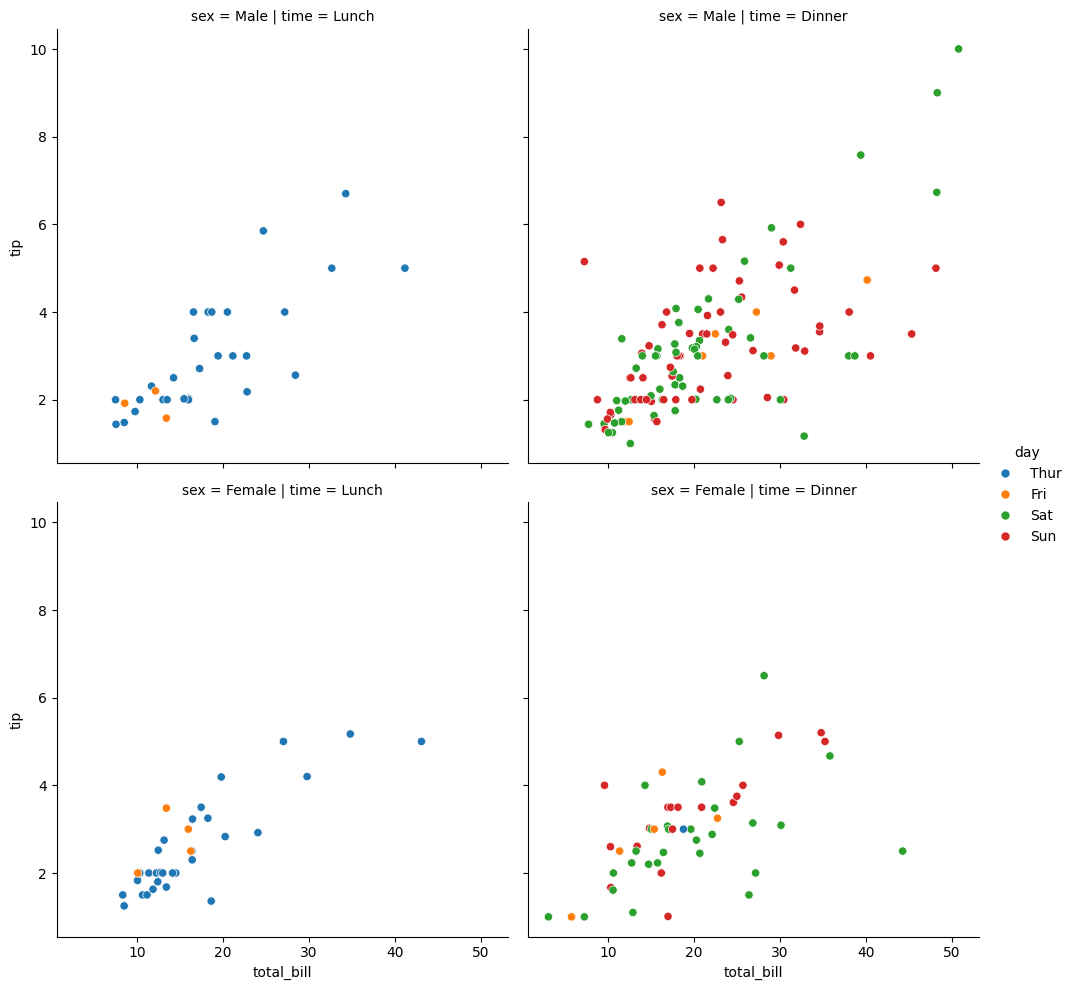

In [13]:
import seaborn as sns

tip = sns.load_dataset('tips')

sns.relplot(x = tip['total_bill'], y = tip['tip'], row = 'sex', col = "time", hue = 'day', height = 5, data = tip)